In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
def normalize(X):
    features_num = X.shape[1]
    Y = np.zeros(X.shape)
    for i in range(features_num):
        #normalization with mean = 0, std = 1
        x = X[:, i]
        sigma = np.std(x)
        x = x - np.mean(x)
        x /= sigma
        Y[:, i] = x
    return Y

In [3]:
#load dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [4]:
#structure of the dataset
print("number of data: " + str(len(x)))
for i1 in range(len(iris.feature_names)):
    print(iris.feature_names[i1], end = "\t")
print("target")
for i in range(5):
    for i1 in range(len(iris.feature_names)):
        print(str(iris.data[i][i1]), end = "\t\t\t")
    print(iris.target_names[iris.target[i]])

number of data: 150
sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)	target
5.1			3.5			1.4			0.2			setosa
4.9			3.0			1.4			0.2			setosa
4.7			3.2			1.3			0.2			setosa
4.6			3.1			1.5			0.2			setosa
5.0			3.6			1.4			0.2			setosa


In [5]:
#it is essential to do moralization before using PCA (principle component analysis)
nor_x = normalize(x)
#nor_x = StandardScaler().fit_transform(x)

#prject from 4D to 2D
pca = PCA(n_components = 2)
principleComponents  = pca.fit_transform(nor_x)
print(principleComponents.shape)

(150, 2)


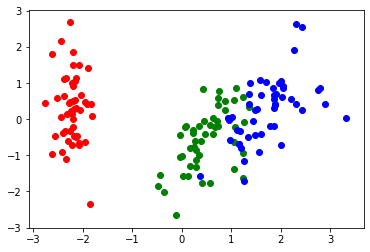

In [6]:
#visualize 2D projection
colors = ['r', 'g', 'b']
for i2 in range(len(y)):
        plt.scatter(principleComponents[i2][0], principleComponents[i2][1], color = colors[y[i2]])


In [7]:
#explained variance
np.sum(pca.explained_variance_ratio_)

0.9581320720000163

In [8]:
#split dataset
x_train, x_test, y_train, y_test = train_test_split(principleComponents, y,test_size=0.2,random_state=0)
#define model
#Guassian (rbf)
clf = svm.SVC(kernel='rbf', C=1, gamma='auto')
#train model
clf.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
#accuracy
print("accuracy of train: " + str(clf.score(x_train,y_train)))
print("accuracy of test: " + str(clf.score(x_test, y_test)))
print("GT: " + str(y_test[:5]))
print("Prediction: " + str(clf.predict(x_test[:5])))

accuracy of train: 0.9166666666666666
accuracy of test: 0.9333333333333333
GT: [2 1 0 2 0]
Prediction: [2 1 0 2 0]
